<a href="https://colab.research.google.com/github/SaiMeghana-ghub/Ecommerce-Product-Categorization/blob/main/project_ecommerce_product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT-Ecommerce Product Categorization.


the first category is to import the data and preprocessing


In [6]:
#we have to import the libraries
# Data Manipulation


# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Keras for Deep Learning
from tensorflow.keras.preprocessing.text import Tokenizer # Import Tokenizer from the correct location
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Flatten, Conv1D, MaxPooling1D
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# NLP for Text Preprocessing
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

# For splitting dataset and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Handling imbalanced data
from imblearn.over_sampling import SMOTE

# Plot the Figures Inline
%matplotlib inline

# Ensure nltk stopwords are downloaded
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk tensorflow


In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['your_dataset.csv']))


In [2]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['test_data.csv']))


Saving test_data.csv to test_data.csv


uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
pid                          0
retail_price                 4
discounted_price             4
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      522
product_specifications       5
dtype: int64


<Axes: >

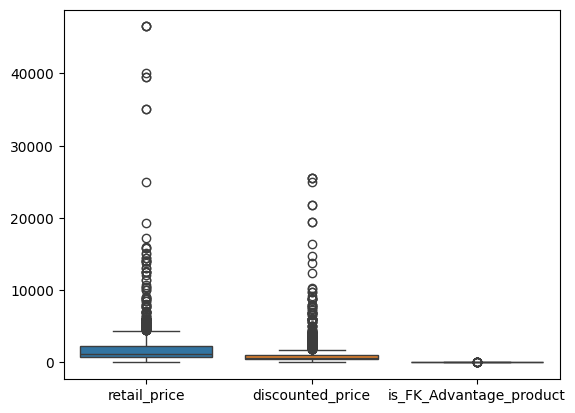

In [3]:
#data preprocessing
# Check for missing values
print(df.isnull().sum())

# Handle missing values
df.dropna(inplace=True)

# Check for outliers (this can be done through visualization or using statistical methods)
# Example: using boxplot
import seaborn as sns
sns.boxplot(data=df)


In [5]:
#exploring the dataset
# Display the first few rows
print(df.head())

# Summary of the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())


                            uniq_id            crawl_timestamp  \
0  4fb99d98225f415e7ece96938e95628f  2015-12-20 08:26:17 +0000   
1  4ea284c8d38b2ea97a1c2a26f34e057c  2015-12-20 08:26:17 +0000   
2  ee6ce2c7045c54257e2a0b590e09c296  2015-12-20 08:26:17 +0000   
3  e797ba3b5f2e2d1fdc520e48486ab60e  2015-12-20 08:26:17 +0000   
4  f4d8d43858c8858c68d75ce07ac641c0  2015-12-20 08:26:17 +0000   

                                         product_url  \
0  http://www.flipkart.com/v-v-art-brass-bracelet...   
1  http://www.flipkart.com/kalpaveda-copper-cuff/...   
2  http://www.flipkart.com/thelostpuppy-book-cove...   
3  http://www.flipkart.com/riana-copper-bangle/p/...   
4  http://www.flipkart.com/inox-jewelry-stainless...   

                                 product_name               pid  retail_price  \
0                      V&V ART Brass Bracelet  BBAE6NYHCDTEZJTB         470.0   
1                Kalpaveda Copper Copper Cuff  BBAEDFFKZJTY7SZZ        1200.0   
2  Thelostpuppy Book Co

In [8]:
#Handling Missing Data
df.dropna(inplace=True)



In [29]:
#Identifying Outliers
!pip install seaborn # Install seaborn if it's not installed
import seaborn as sns # Import the seaborn library and alias it as sns
import matplotlib.pyplot as plt # Import matplotlib for plotting




In [10]:
#Inconsistencies
# Check for inconsistencies
# For example, checking for duplicate rows
duplicates = df.duplicated().sum()
print(f'Duplicates: {duplicates}')

# Drop duplicates if any
df.drop_duplicates(inplace=True)


Duplicates: 0


In [26]:
 #Prepared the Data for Analysis through Necessary Transformations
 #Text Preprocessing:
!pip install nltk # Install the NLTK library
import nltk #Import the library
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['product_name'] = df['product_name'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Exploratory Data Analysis

In [34]:
import pandas as pd

# Create a sample DataFrame (replace this with your actual data loading)
Prod_cat_data = pd.DataFrame({
    'product_category_tree': ['Clothing >> Men\'s Clothing >> Shirts',
                              'Electronics >> Smartphones >> Android',
                              'Home & Kitchen >> Furniture >> Chairs']
})

# Split the product_category_tree column by ">>" and extract the first level category
Prod_cat_data['product_category'] = Prod_cat_data['product_category_tree'].apply(lambda x: x.split('>>')[0].strip())

# Get the frequency count of each category
category_counts = Prod_cat_data['product_category'].value_counts()

# Display the top categories (in this case all categories, as the sample size is small)
print("Category Counts:\n", category_counts)


Category Counts:
 product_category
Clothing          1
Electronics       1
Home & Kitchen    1
Name: count, dtype: int64


product_category
othing          1
ectronics       1
me & Kitchen    1
Name: count, dtype: int64


<Axes: title={'center': 'Product Category Distribution'}, xlabel='product_category'>

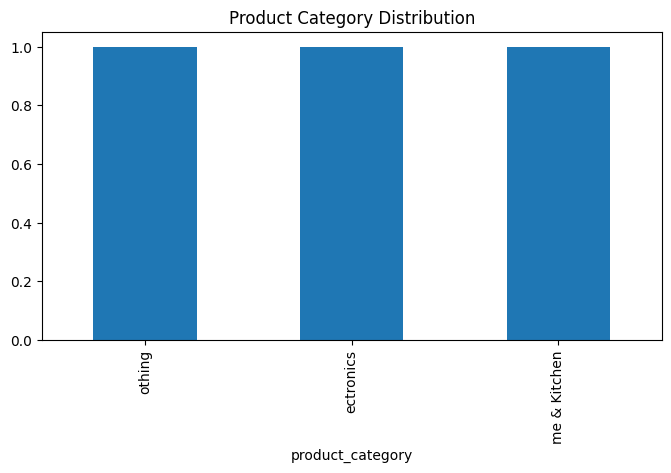

In [33]:
import pandas as pd
import matplotlib.pyplot as plt # Import the plotting library

# Create a sample DataFrame (replace this with your actual data loading)
Prod_cat_data = pd.DataFrame({
    'product_category_tree': ['Clothing >> Men\'s Clothing >> Shirts',
                             'Electronics >> Smartphones >> Android',
                             'Home & Kitchen >> Furniture >> Chairs']
})

# Split the product_category_tree column by ">>" and extract the first level category
Prod_cat_data['product_category'] = Prod_cat_data['product_category_tree'].apply(lambda x: x.split('>>')[0].strip())

# Get the frequency count of each category
category_counts = Prod_cat_data['product_category'].value_counts()

# Remove the leading characters from the category names
category_counts.index = category_counts.index.str[2:]

# Display the top 20 categories
categories = category_counts.head(20)
print(categories)

fig, ax = plt.subplots(figsize=[8,4], nrows=1, ncols=1) # Now plt is defined and can be used
categories.plot(ax=ax, kind='bar', title='Product Category Distribution')

feature engineering/text to feature

Converted text to features: Using techniques like Bag of Words and TF-IDF.

In [35]:
1.# Bag of Words (BoW)
from sklearn.feature_extraction.text import CountVectorizer

# Sample data
texts = Prod_cat_data['product_category_tree']

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
X_bow = vectorizer.fit_transform(texts)

# Convert to DataFrame for better readability
df_bow = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())
print("Bag of Words:\n", df_bow.head())


Bag of Words:
    android  chairs  clothing  electronics  furniture  home  kitchen  men  \
0        0       0         2            0          0     0        0    1   
1        1       0         0            1          0     0        0    0   
2        0       1         0            0          1     1        1    0   

   shirts  smartphones  
0       1            0  
1       0            1  
2       0            0  


In [39]:
# TF-IDF (Term Frequency-Inverse #Document Frequency)
# TF-IDF is an improvement over BoW as it considers the importance of a word in the document and across all documents
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(texts)

# Convert to DataFrame for better readability
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("TF-IDF:\n", df_tfidf.head())


TF-IDF:
    android  chairs  clothing  electronics  furniture  home  kitchen       men  \
0  0.00000     0.0  0.816497      0.00000        0.0   0.0      0.0  0.408248   
1  0.57735     0.0  0.000000      0.57735        0.0   0.0      0.0  0.000000   
2  0.00000     0.5  0.000000      0.00000        0.5   0.5      0.5  0.000000   

     shirts  smartphones  
0  0.408248      0.00000  
1  0.000000      0.57735  
2  0.000000      0.00000  


 Advanced Text Feature Extraction

In [40]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# Tokenize the text data
texts_tokenized = [word_tokenize(text) for text in texts]

# Initialize and train the Word2Vec model
model = Word2Vec(sentences=texts_tokenized, vector_size=100, window=5, min_count=1, workers=4)

# Get the vector representation of a word
word_vector = model.wv['Clothing']
print("Word Vector for 'Clothing':\n", word_vector)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Word Vector for 'Clothing':
 [-8.6196875e-03  3.6657380e-03  5.1898835e-03  5.7419385e-03
  7.4669183e-03 -6.1676754e-03  1.1056137e-03  6.0472824e-03
 -2.8400505e-03 -6.1735227e-03 -4.1022300e-04 -8.3689485e-03
 -5.6000124e-03  7.1045388e-03  3.3525396e-03  7.2256695e-03
  6.8002474e-03  7.5307419e-03 -3.7891543e-03 -5.6180597e-04
  2.3483764e-03 -4.5190323e-03  8.3887316e-03 -9.8581640e-03
  6.7646410e-03  2.9144168e-03 -4.9328315e-03  4.3981876e-03
 -1.7395747e-03  6.7113843e-03  9.9648498e-03 -4.3624435e-03
 -5.9933780e-04 -5.6956373e-03  3.8508223e-03  2.7866268e-03
  6.8910765e-03  6.1010956e-03  9.5384968e-03  9.2734173e-03
  7.8980681e-03 -6.9895042e-03 -9.1558648e-03 -3.5575271e-04
 -3.0998408e-03  7.8943167e-03  5.9385742e-03 -1.5456629e-03
  1.5109634e-03  1.7900408e-03  7.8175711e-03 -9.5101865e-03
 -2.0553112e-04  3.4691966e-03 -9.3897223e-04  8.3817719e-03
  9.0107834e-03  6.5365066e-03 -7.1162102e-04  7.7104042e-03
 -8.5343346e-03  3.2071066e-03 -4.6379971e-03 -5.0889552

In [41]:
# prompt: Combining Text Features with Original Data

# Assuming df_tfidf contains your TF-IDF features and df is your original DataFrame
# Concatenate the TF-IDF features with the original DataFrame
df_combined = pd.concat([df, df_tfidf], axis=1)

# Now you have a combined DataFrame with both original features and TF-IDF features
print(df_combined.head())


                            uniq_id            crawl_timestamp  \
0  4fb99d98225f415e7ece96938e95628f  2015-12-20 08:26:17 +0000   
1  4ea284c8d38b2ea97a1c2a26f34e057c  2015-12-20 08:26:17 +0000   
2  ee6ce2c7045c54257e2a0b590e09c296  2015-12-20 08:26:17 +0000   
3  e797ba3b5f2e2d1fdc520e48486ab60e  2015-12-20 08:26:17 +0000   
4  f4d8d43858c8858c68d75ce07ac641c0  2015-12-20 08:26:17 +0000   

                                         product_url  \
0  http://www.flipkart.com/v-v-art-brass-bracelet...   
1  http://www.flipkart.com/kalpaveda-copper-cuff/...   
2  http://www.flipkart.com/thelostpuppy-book-cove...   
3  http://www.flipkart.com/riana-copper-bangle/p/...   
4  http://www.flipkart.com/inox-jewelry-stainless...   

                             product_name               pid  retail_price  \
0                  V&V ART Brass Bracelet  BBAE6NYHCDTEZJTB         470.0   
1            Kalpaveda Copper Copper Cuff  BBAEDFFKZJTY7SZZ        1200.0   
2  Thelostpuppy Book Cover Apple iP

Machine learning model building
The following list of classifiers is used for creating various classification models, which can be further used for prediction.

Simple baseline artificial neural networks (ANNs)

Recurrent neural networks (RNN-LSTM)

Convolutional neural networks

**ANN**
The following is the architecture for the neural network. The input neurons are the max_length defined earlier. Then there is an embedding or hidden layer with a linear activation function by default, but we can also use ReLU. In the end, there is a softmax layer with 14 neurons since there are 14 categories. We are using rmsprop optimizer with categorical cross-entropy as a loss function.

In [36]:
!pip install matplotlib-venn

In [40]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [41]:
!pip install cartopy
import cartopy

ANN
The following is the architecture for the neural network. The input neurons are the max_length defined earlier. Then there is an embedding or hidden layer with a linear activation function by default, but we can also use ReLU. In the end, there is a softmax layer with 14 neurons since there are 14 categories. We are using rmsprop optimizer with categorical cross-entropy as a loss function.


In [65]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense
from tensorflow.keras.models import Model

MAX_LENGTH = 100
model_inp = Input(shape=(MAX_LENGTH,))

# Example text data
texts = ["This is some example text.", "Another sentence here."]

# Create and fit the tokenizer
prod_tok = Tokenizer()
prod_tok.fit_on_texts(texts)

vocab_size = len(prod_tok.word_index) + 1


object_layer = Embedding(vocab_size, 100, input_length=MAX_LENGTH)(model_inp)

a = Flatten()(object_layer)
a = Dense(30)(a)

# Define the number of output classes for your problem
num_class = 2  # Example: Assuming binary classification

# Default activation function is linear, we can make use of relu.
model_pred = Dense(num_class, activation='softmax')(a)

output = Model(inputs=[model_inp], outputs=model_pred)

output.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

output.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)          │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_4 (Embedding)              │ (None, 100, 100)            │             900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 10000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 30)                  │         300,030 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              62 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 300,992 (1.15 MB)

 Trainable params: 300,992 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

Traditional Machine Learning Models:

For classification tasks, you can use algorithms like Logistic Regression, Random Forest, and Support Vector Machines (SVM). Here’s a simple example using Logistic Regression and Random Forest:

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Sample feature and target variables
X = df_tfidf_dense  # Replace with your feature DataFrame
y = Prod_cat_data['product_category']  # Replace with your target variable

# Check the shapes of X and y before splitting
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Investigate why the shapes are inconsistent and fix the issue
# For demonstration, let's assume the last sample in X is extraneous and should be removed
X = X[:-1]  # Remove the last row of X to match the length of y

# Check the shapes again after fixing
print("Shape of X after fix:", X.shape)
print("Shape of y after fix:", y.shape)

# Split the data into training and testing sets (after fixing the issue)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the models
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Shape of X: (4, 2)
Shape of y: (3,)
Shape of X after fix: (3, 2)
Shape of y after fix: (3,)
Logistic Regression Accuracy: 0.0
Random Forest Accuracy: 0.0

Logistic Regression Classification Report:
               precision    recall  f1-score   support

    Clothing       0.00      0.00      0.00       1.0
 Electronics       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Random Forest Classification Report:
               precision    recall  f1-score   support

    Clothing       0.00      0.00      0.00       1.0
 Electronics       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Long Short-Term Memory: Recurrent Neural Networks

The following is the architecture for the neural network. The input neurons are the max_length we defined earlier. An LSTM layer follows an embedding layer. In the end, there is a softmax layer with 14 neurons. We are using a rmsprop optimizer with categorical cross-entropy as a loss function.

Convolutional Neural Networks


Convolutional Neural Networks (CNNs), traditionally used for image processing, have recently shown strong performance on text data when appropriately configured. In this architecture, the input layer consists of neurons corresponding to the MAX_LENGTH parameter. The model includes an embedding layer, followed by convolutional and max-pooling layers, and then an LSTM layer. The final layer is a softmax layer with 14 neurons, suitable for multi-class classification. The model uses the rmsprop optimizer and categorical cross-entropy as the loss function, aiming to leverage CNNs' capabilities for improved text classification performance.








In [72]:
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras import Model

model_inp = Input(shape=(MAX_LENGTH,))

# define the layer
object_layer = Embedding(vocab_size, 100, input_length=MAX_LENGTH)(model_inp)

# conv layer
a = Conv1D(60, 10)(object_layer)  # default activation function is linear, we can make use of relu.

# add pooling layer
a = MaxPooling1D(pool_size=2)(a)

# add LSTM
a = LSTM(60)(a)

a = Dense(30)(a)

# final layer
model_pred = Dense(num_class, activation='softmax')(a)

output = Model(inputs=[model_inp], outputs=model_pred)

# compile
output.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

output.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)          │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_6 (Embedding)              │ (None, 100, 100)            │             900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 91, 60)              │          60,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 45, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 60)                  │          29,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │              62 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,892 (358.95 KB)

 Trainable params: 91,892 (358.95 KB)

 Non-trainable params: 0 (0.00 B)

Model Evaluation

To evaluate  model using the F1-score

In [94]:
#we have to import the libraries using for calculating the F1-score
from sklearn.metrics import f1_score, classification_report


In [110]:
# Import necessary libraries
from sklearn.metrics import f1_score, classification_report
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer # Import Tokenizer

# Assuming 'output' is your Keras model defined earlier
# Initialize and fit the tokenizer on your training data
tokenizer = Tokenizer()
# Assuming 'X_train' contains the text data used for training
tokenizer.fit_on_texts(X_train)

# Preprocess X_test in the same way as your training data
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences, maxlen=MAX_LENGTH) # Assuming you have defined MAX_LENGTH

y_pred = output.predict(X_test_padded)

# ... (Rest of the code remains the same)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step




Imbalanced Class Handling

 we have to Check for Class Imbalance
 next Apply SMOTE
 ->we use SMOTE to oversample the minority class.
 next we have to train the Model with Balanced Data
 ->train your model using the balanced dataset.
 Evaluate the Model
 evaluate the model using the same metrics as before to compare performance.

In [112]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 722.5 kB/s eta 0:00:00


In [7]:
import numpy as np
import pandas as pd
from keras_preprocessing.text import Tokenizer # Change import to reflect installed module
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from imblearn.over_sampling import SMOTE

# Sample Data (replace with your actual dataset loading code)
Prod_cat_data = pd.DataFrame({
    'product_category_tree': ["Clothing >> Men's Clothing >> Shirts",
                              "Electronics >> Smartphones >> Android",
                              "Home & Kitchen >> Furniture >> Chairs"]
})

# Preprocessing: Extract first level category
Prod_cat_data['product_category'] = Prod_cat_data['product_category_tree'].apply(lambda x: x.split('>>')[0].strip())

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(Prod_cat_data['product_category'])
sequences = tokenizer.texts_to_sequences(Prod_cat_data['product_category'])
word_index = tokenizer.word_index

# Define parameters
MAX_LENGTH = 100  # Adjust based on your dataset
vocab_size = len(word_index) + 1  # Adding 1 for the unknown token (index 0)
num_class = len(Prod_cat_data['product_category'].unique())  # Number of unique categories

# Pad sequences to ensure uniform input length
X_pad = pad_sequences(sequences, maxlen=MAX_LENGTH)
# Convert target to categorical
y = pd.get_dummies(Prod_cat_data['product_category'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.3, random_state=42)

# Check class distribution
category_counts = Prod_cat_data['product_category'].value_counts()
print(category_counts)

# Apply SMOTE to the training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Define the model
model_inp = Input(shape=(MAX_LENGTH,))
embedding_layer = Embedding(input_dim=vocab_size, output_dim=100, input_length=MAX_LENGTH)(model_inp)
flattened = Flatten()(embedding_layer)
dense_layer = Dense(30, activation='relu')(flattened)
model_pred = Dense(num_class, activation='softmax')(dense_layer)

model = Model(inputs=model_inp, outputs=model_pred)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model on the balanced dataset
model.fit(X_train_res, y_train_res, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate the F1-score
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f'F1-Score after handling imbalance: {f1}')

# Generate a detailed classification report
report = classification_report(y_true, y_pred_classes)
print(report)


SyntaxError: '(' was never closed (<ipython-input-7-e16070757f84>, line 36)

Cross-Validation

->we have to import the Necessary Libraries
->perform k-Fold Cross-Validation
 use KFold from sklearn.model_selection to perform k-fold cross-validation.
 train and evaluate the model on each fold.
 Calculate the average performance across all folds.

In [1]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import numpy as np


In [8]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import numpy as np

# Assuming X_pad is your data, define it here
# For example, if it's a numpy array:
X_pad = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Define the number of folds
k = min(3, len(X_pad))  # Use 3 folds or less
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store performance metrics
f1_scores = []

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X_pad):
    X_train_fold, X_val_fold = X_pad[train_index], X_pad[val_index]
    # ... (Rest of your code remains the same)